# 0. 라이브러리

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats

In [105]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format="{:.5f}".format

# 1. 데이터 불러오기

In [106]:
data = pd.read_csv('./data/기업별재무거시데이터.csv',
    dtype={'종목코드':str})

In [107]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000,0,NaN


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기업명       1522 non-null   object 
 1   종목코드      1522 non-null   object 
 2   상장일       1522 non-null   object 
 3   지속기간      1522 non-null   int64  
 4   기준연도      1522 non-null   int64  
 5   부채비율      1522 non-null   float64
 6   자기자본비율    1522 non-null   float64
 7   총자산영업이익율  1522 non-null   float64
 8   ROA       1522 non-null   float64
 9   ROE       1522 non-null   float64
 10  매출액영업이익율  1522 non-null   float64
 11  총자산증가율    1522 non-null   float64
 12  매출액증가율    1522 non-null   float64
 13  당기순이익증가율  1522 non-null   float64
 14  영업이익증가율   1522 non-null   float64
 15  유동비율      1522 non-null   float64
 16  자산회전율     1522 non-null   float64
 17  부채회전율     1522 non-null   float64
 18  자본회전율     1522 non-null   float64
 19  총매출액규모    1522 non-null   float64
 20  총자산규모     1522 non-null   floa

# 2. T-test

In [109]:
from scipy.stats import shapiro, levene, ttest_ind

In [110]:
def t_test(x1, x2, col, alpha = 0.05):
    print(f'[{col}]의 결과')

    x1 = np.array(x1, dtype=np.float64)
    x2 = np.array(x2, dtype=np.float64)

    # 정규성 검정
    _, p_value_norm_x1 = shapiro(x1)
    _, p_value_norm_x2 = shapiro(x2)

    # 등분산성 검정
    _, p_value_var = levene(x1, x2)

    if p_value_norm_x1 > alpha and p_value_norm_x2 > alpha:
        print("두 그룹 모두 정규성 만족")
    else:
        print("적어도 한 그룹은 정규성 만족하지 않음")

    if p_value_var > alpha:
        print("등분산성 만족")
    else:
        print("등분산성 만족")

    # 가정이 만족되면 t-검정 수행
    if (p_value_norm_x1 > alpha and p_value_norm_x2 > alpha) and (p_value_var > alpha):
        _, pvalue_ttest = stats.ttest_ind(x1, x2)
        print("t-검정 결과: p-value =", pvalue_ttest)
    else:
        print("가정을 만족하지 않으므로 t-test 불가")
    print('----------------------------')

In [111]:
for i in range(5, data.shape[1]-1):
    col = data.columns[i]
    listed = data.loc[data.부도==0, col]
    delisted = data.loc[data.부도==1, col]
    t_test(listed, delisted, col)

[부채비율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[자기자본비율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[총자산영업이익율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[ROA]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[ROE]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[매출액영업이익율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[총자산증가율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[매출액증가율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[당기순이익증가율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[영업이익증가율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족
가정을 만족하지 않으므로 t-test 불가
----------------------------
[유동비율]의 결과
적어도 한 그룹은 정규성 만족하지 않음
등분산성 만족


# 2. 생존분석

- 생존시간: `지속기간`
- 중도절단시간: `폐지일`
- 관측시간: 2022-12-31
- 절단표시변수: `부도`

## 1) 비모수적 방법
- 카플란마이어

In [112]:
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test, multivariate_logrank_test

In [113]:
data1 = data[['지속기간', '부도']]
data1.sort_values('지속기간', inplace=True)
data1.head(2)

,지속기간,부도
268,670,0
1044,690,0


In [114]:
kmf = KaplanMeierFitter()
kmf.fit(data1['지속기간'], event_observed=data1['부도'])
pd.concat([kmf.survival_function_, kmf.confidence_interval_survival_function_], axis=1).head(10)

,KM_estimate,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.00000,1.00000,1.00000,1.00000
670.00000,1.00000,1.00000,1.00000
690.00000,1.00000,1.00000,1.00000
707.00000,1.00000,1.00000,1.00000
708.00000,1.00000,1.00000,1.00000
712.00000,1.00000,1.00000,1.00000
713.00000,1.00000,1.00000,1.00000
719.00000,1.00000,1.00000,1.00000
720.00000,1.00000,1.00000,1.00000
722.00000,1.00000,1.00000,1.00000


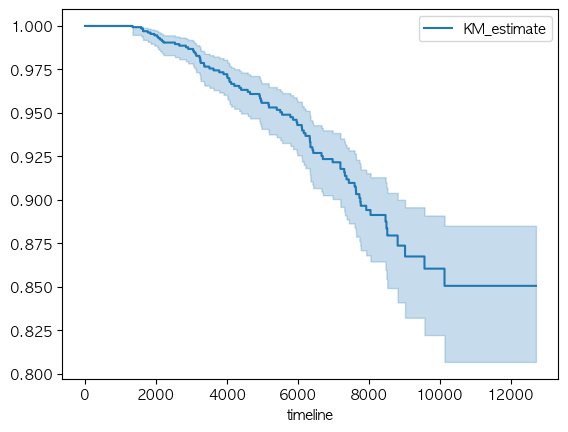

In [115]:
kmf.plot()
plt.show()

## 2) 모수적 방법
- 지수, 와이불, 로그정규, 로그로그

In [116]:
from lifelines import KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalAFTFitter, LogLogisticAFTFitter, WeibullAFTFitter

In [117]:
y = data1.지속기간
d = data1. 부도
data1.head()

,지속기간,부도
268,670,0
1044,690,0
295,707,0
578,708,0
345,712,0


### ExponentialFitter
$$
S(t) = \exp\left(\frac{-t}{\lambda}\right)
$$

In [118]:
exp_fitter = ExponentialFitter()
exp_fitter.fit(data1['지속기간'], event_observed=data1['부도'])
exp_fitter.print_summary(decimals=4)

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1522 total observations, 1435 right-censored observations>
   number of observations = 1522
number of events observed = 87
           log-likelihood = -1079.1451
               hypothesis = lambda_ != 0

---
              coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 89676.7501  9614.3559       70832.9588      108520.5413

          cmp to      z      p   -log2(p)
lambda_   0.0000 9.3274 <5e-05    66.3206
---
AIC = 2160.2902

### WeibullFitter
$$
S(t) = \exp\left(-\left[\frac{t}{\lambda}\right]^\rho\right)
$$

In [119]:
weibull_fitter = WeibullFitter()
weibull_fitter.fit(data1['지속기간'], event_observed=data1['부도'])
weibull_fitter.print_summary(decimals=4)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1522 total observations, 1435 right-censored observations>
   number of observations = 1522
number of events observed = 87
           log-likelihood = -1054.2160
               hypothesis = lambda_ != 1, rho_ != 1

---
              coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 24600.2102  2835.6168       19042.5033       30157.9170
rho_        2.0166     0.1741           1.6753           2.3579

          cmp to      z      p   -log2(p)
lambda_   1.0000 8.6751 <5e-05    57.7477
rho_      1.0000 5.8386 <5e-05    27.5016
---
AIC = 2112.4319

### Custom regression models
https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Custom%20Regression%20Models.html

In [120]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000,0,NaN


In [133]:
data2 = data.drop(['기업명', '종목코드', '상장일', '기준연도', '폐지일'], axis=1)
data2 = data2[['지속기간', '부도', '부채비율', '자기자본비율', '총자산영업이익율', 'ROA', 'ROE', '매출액영업이익율',
       '총자산증가율', '매출액증가율', '당기순이익증가율', '영업이익증가율', '유동비율', '자산회전율', '부채회전율',
       '자본회전율', '총매출액규모', '총자산규모', 'GDP성장률', '원달러환율', 'CD91일', '코스닥종가',
       '전산업생산지수', '경제심리지수', '뉴스심리지수']]
data2.head(1)

,지속기간,부도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
0,7861,0,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000


In [187]:
from lifelines.fitters import ParametricRegressionFitter
from autograd import numpy as np

class ExponentialAFTFitter(ParametricRegressionFitter):

    # this class property is necessary, and should always be a non-empty list of strings.
    _fitted_parameter_names = ['lambda_']

    def _cumulative_hazard(self, params, t, Xs):
        # params is a dictionary that maps unknown parameters to a numpy vector.
        # Xs is a dictionary that maps unknown parameters to a numpy 2d array
        beta = params['lambda_']
        X = Xs['lambda_']
        lambda_ = np.exp(np.dot(X, beta))
        return t / lambda_


# the below variables maps {dataframe columns, formulas} to parameters
regressors = {
    # could also be: 'lambda_': rossi.columns.difference(['week', 'arrest'])
    'lambda_': "부채비율 + 자기자본비율 + 총자산영업이익율 + ROA + ROE + 매출액영업이익율 + 총자산증가율 +\
        당기순이익증가율 + 영업이익증가율 + 유동비율 + 자산회전율 + 부채회전율 + 자본회전율 + 총매출액규모 + 총자산규모+\
        GDP성장률 + 원달러환율 + 소비자물가지수증감 + CD91일 + 코스피종가 + 코스닥종가 + 경상수지 + 전산업생산지수 +\
        경제심리지수 + 뉴스심리지수 + 1"
}

In [188]:
exponential_aft = ExponentialAFTFitter()
exponential_aft.fit(data2, '지속기간', '부도', regressors=regressors)
exponential_aft.print_summary(decimals=4)

<lifelines.ExponentialAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -4006.4981
         time fit was run = 2023-12-18 12:26:28 UTC

---
                     coef  exp(coef)                 se(coef)            coef lower 95%           coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                                         
lambda_ Intercept  0.0113     1.0114 4910154933857480704.0000 -9623726828872312832.0000 9623726828872312832.0000               0.0000                  inf
        부채비율       0.0000     1.0000       4481071736751.7021       -8782739216173.6865       8782739216173.6865               0.0000                  inf
        자기자본비율     0.0481     1.0492   16217843627014544.0000   -31786389415850948.0000   31786389415850948.0000               0.0000                  inf
        총자산영업이익율   0.0003     1.0003   27382456032013456.0000   -53668627630997928.0000   53668627630997928.0000               0.0000                  inf
        ROA       -0.0037     0.9963    5004838547239055.0000    -9809303301026314.0000    9809303301026314.0000               0.0000                  inf
        ROE       -0.0001     0.9999     576952513135860.7500    -1130806146536159.5000    1130806146536159.5000               0.0000                  inf
        매출액영업이익율  -0.0000     1.0000     388136625487411.5000     -760733807036237.7500     760733807036237.7500               0.0000                  inf
        총자산증가율    -0.0000     1.0000      86734105098517.2188     -169995722224405.6250     169995722224405.6250               0.0000                  inf
        당기순이익증가율   0.0000     1.0000       5818476276095.1348      -11404003946047.1953      11404003946047.1953               0.0000                  inf
        영업이익증가율    0.0000     1.0000      12007274975894.8457      -23533826505222.9414      23533826505222.9414               0.0000                  inf
        유동비율       0.0010     1.0010    3153185728945293.0000    -6180130465298451.0000    6180130465298451.0000               0.0000                  inf
        자산회전율      0.0350     1.0357   26887628881156144.0000   -52698784236745032.0000   52698784236745032.0000               0.0000                  inf
        부채회전율      0.0056     1.0056    6900590396839953.0000   -13524908649869268.0000   13524908649869268.0000               0.0000                  inf
        자본회전율      0.0031     1.0031    1063223434326178.3750    -2083879638798297.0000    2083879638798297.0000               0.0000                  inf
        총매출액규모     0.1021     1.1074    8746617040621510.0000   -17143054386182470.0000   17143054386182470.0000               0.0000                  inf
        총자산규모      0.1677     1.1826   10621649514066282.0000   -20818050503977280.0000   20818050503977280.0000               0.0000                  inf
        GDP성장률     0.1734     1.1894  562805481494462016.0000 -1103078474030869376.0000 1103078474030869376.0000               0.0000                  inf
        원달러환율      0.0146     1.0147     790580179805475.2500    -1549508679309931.7500    1549508679309931.7500               0.0000                  inf
        CD91일      0.3560     1.4276  600630650113873024.0000 -1177214442234069760.0000 1177214442234069760.0000               0.0000                  inf
        코스닥종가      0.0034     1.0034     986744696095205.1250    -1933984066282523.0000    1933984066282523.0000               0.0000                  inf
        전산업생산지수    0.2088     1.2322   30649238847483296.0000   -60071404294633176.0000   60071404294633176.0000               0.0000                  inf
        경제심리지수     0.1865     1.2050  132207670266770352.0000  -259122272202816864.0000  25912227220281

In [135]:
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data2, '지속기간', '부도')
weibull_aft.print_summary(decimals=4)

<lifelines.WeibullAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -805.3328
         time fit was run = 2023-12-18 08:29:29 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ CD91일      3.5851    36.0557     1.2635           1.1086           6.0615               3.0301             429.0360
        GDP성장률     0.1424     1.1530     0.6527          -1.1369           1.4217               0.3208               4.1441
        ROA       -0.1148     0.8915     0.0591          -0.2307           0.0011               0.7939               1.0011
        ROE        0.0070     1.0070     0.0071          -0.0069           0.0208               0.9931               1.0210
        경제심리지수     0.2369     1.2673     0.1730          -0.1022           0.5760               0.9029               1.7789
        뉴스심리지수    -0.4246     0.6540     0.1193          -0.6586          -0.1907               0.5176               0.8264
        당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001          -0.0000               0.9999               1.0000
        매출액영업이익율  -0.0122     0.9878     0.0201          -0.0516           0.0271               0.9497               1.0275
        매출액증가율     0.0003     1.0003     0.0003          -0.0002           0.0008               0.9998               1.0008
        부채비율       0.0000     1.0000     0.0000          -0.0001           0.0001               0.9999               1.0001
        부채회전율      0.0089     1.0090     0.0508          -0.0906           0.1085               0.9133               1.1146
        영업이익증가율    0.0001     1.0001     0.0001           0.0000           0.0002               1.0000               1.0002
        원달러환율     -0.0079     0.9921     0.0042          -0.0161           0.0002               0.9840               1.0002
        유동비율      -0.0136     0.9865     0.0078          -0.0290           0.0017               0.9714               1.0017
        자기자본비율     0.1111     1.1175     0.1179          -0.1200           0.3421               0.8869               1.4079
        자본회전율      0.0011     1.0011     0.0075          -0.0136           0.0158               0.9864               1.0159
        자산회전율      0.3260     1.3854     0.2425          -0.1493           0.8013               0.8613               2.2284
        전산업생산지수   -0.2683     0.7647     0.0867          -0.4382          -0.0983               0.6452               0.9064
        총매출액규모    -0.1324     0.8760     0.0954          -0.3194           0.0546               0.7266               1.0562
        총자산규모      0.1929     1.2128     0.1034          -0.0097           0.3955               0.9903               1.4851
        총자산영업이익율   0.3987     1.4899     0.2299          -0.0519           0.8493               0.9495               2.3381
        총자산증가율     0.0008     1.0008     0.0007          -0.0006           0.0022               0.9994               1.0022
        코스닥종가      0.0237     1.0240     0.0061           0.0117           0.0357               1.0118               1.0363
        Intercept 39.4080 1.3022e+17    13.7927          12.3749          66.4411           2.3678e+05           7.1615e+28
rho_    Intercept  1.0822     2.9512     0.0874           0.9109           1.2535               2.4866               3.5025

                    cmp to       z      p   -log2(p)
param   covariate                                   
lambda_ CD91일       0.0000  2.8373 0.0045     7.7802
        GDP성장률      0.0000  0.2181 0.8273     0.2735
        ROA         0.0000 -1.9411 0.0522     4.2586
        ROE         0.0000  0.9859 0.3242     1.6251
      

In [136]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(data2, '지속기간', '부도')
lognormal_aft.print_summary(decimals=4)

<lifelines.LogNormalAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -811.0444
         time fit was run = 2023-12-18 08:29:30 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                          
mu_    CD91일      5.3104   202.4296     1.6145           2.1459           8.4749               8.5500            4792.7111
       GDP성장률     0.7878     2.1987     0.8363          -0.8512           2.4269               0.4269              11.3240
       ROA       -0.1185     0.8882     0.0794          -0.2742           0.0371               0.7602               1.0378
       ROE        0.0050     1.0050     0.0090          -0.0127           0.0226               0.9874               1.0229
       경제심리지수     0.2116     1.2356     0.2238          -0.2270           0.6502               0.7969               1.9159
       뉴스심리지수    -0.5972     0.5503     0.1553          -0.9017          -0.2928               0.4059               0.7462
       당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001           0.0000               0.9999               1.0000
       매출액영업이익율  -0.0152     0.9849     0.0251          -0.0644           0.0340               0.9376               1.0346
       매출액증가율     0.0007     1.0007     0.0003           0.0001           0.0013               1.0001               1.0013
       부채비율       0.0000     1.0000     0.0001          -0.0001           0.0001               0.9999               1.0001
       부채회전율      0.1260     1.1343     0.0638           0.0010           0.2510               1.0010               1.2854
       영업이익증가율    0.0001     1.0001     0.0001          -0.0001           0.0002               0.9999               1.0002
       원달러환율     -0.0146     0.9855     0.0057          -0.0256          -0.0035               0.9747               0.9965
       유동비율      -0.0094     0.9907     0.0078          -0.0246           0.0058               0.9757               1.0058
       자기자본비율    -0.0839     0.9195     0.1107          -0.3009           0.1330               0.7402               1.1423
       자본회전율      0.0028     1.0028     0.0107          -0.0182           0.0239               0.9819               1.0242
       자산회전율      0.0624     1.0644     0.2345          -0.3971           0.5220               0.6723               1.6854
       전산업생산지수   -0.4113     0.6628     0.1135          -0.6338          -0.1889               0.5306               0.8279
       총매출액규모    -0.1167     0.8899     0.1078          -0.3280           0.0946               0.7204               1.0992
       총자산규모      0.2808     1.3242     0.1151           0.0552           0.5064               1.0567               1.6593
       총자산영업이익율   0.3385     1.4028     0.2298          -0.1118           0.7888               0.8942               2.2007
       총자산증가율     0.0002     1.0002     0.0010          -0.0018           0.0022               0.9982               1.0022
       코스닥종가      0.0342     1.0348     0.0079           0.0188           0.0496               1.0190               1.0509
       Intercept 66.2905 6.1603e+28    18.2725          30.4771         102.1039           1.7221e+13           2.2036e+44
sigma_ Intercept -0.7591     0.4681     0.0771          -0.9103          -0.6080               0.4024               0.5444

                   cmp to       z      p   -log2(p)
param  covariate                                   
mu_    CD91일       0.0000  3.2891 0.0010     9.9584
       GDP성장률      0.0000  0.9421 0.3461     1.5305
       ROA         0.0000 -1.4924 0.1356     2.8825
       ROE         0.0000  0.5504 0.5820     0.7809
       경제심리지수      0.0000  0.9455 0.3

In [137]:
loglogistic_aft = LogLogisticAFTFitter()
loglogistic_aft.fit(data2, '지속기간', '부도')
loglogistic_aft.print_summary(decimals=4)

<lifelines.LogLogisticAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -813.5234
         time fit was run = 2023-12-18 08:29:31 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                          
alpha_ CD91일      0.5103     1.6657     1.8353          -3.0869           4.1074               0.0456              60.7902
       GDP성장률    -1.1540     0.3154     0.9019          -2.9216           0.6137               0.0538               1.8472
       ROA       -0.0873     0.9164     0.0790          -0.2421           0.0674               0.7850               1.0698
       ROE        0.0116     1.0117     0.0089          -0.0059           0.0291               0.9941               1.0295
       경제심리지수     0.4818     1.6189     0.2339           0.0234           0.9401               1.0237               2.5602
       뉴스심리지수    -0.3643     0.6947     0.1696          -0.6967          -0.0319               0.4982               0.9686
       당기순이익증가율  -0.0001     0.9999     0.0000          -0.0001          -0.0000               0.9999               1.0000
       매출액영업이익율  -0.0181     0.9821     0.0244          -0.0659           0.0298               0.9362               1.0302
       매출액증가율     0.0007     1.0007     0.0003           0.0001           0.0014               1.0001               1.0014
       부채비율      -0.0000     1.0000     0.0001          -0.0001           0.0001               0.9999               1.0001
       부채회전율      0.0687     1.0711     0.0616          -0.0521           0.1894               0.9493               1.2085
       영업이익증가율    0.0001     1.0001     0.0001          -0.0000           0.0002               1.0000               1.0002
       원달러환율      0.0003     1.0003     0.0066          -0.0126           0.0132               0.9875               1.0133
       유동비율      -0.0106     0.9894     0.0089          -0.0280           0.0068               0.9723               1.0068
       자기자본비율    -0.0737     0.9290     0.1215          -0.3118           0.1644               0.7321               1.1787
       자본회전율     -0.0023     0.9977     0.0092          -0.0203           0.0157               0.9799               1.0159
       자산회전율      0.2538     1.2890     0.2657          -0.2670           0.7747               0.7657               2.1699
       전산업생산지수   -0.2397     0.7869     0.1261          -0.4869           0.0075               0.6145               1.0076
       총매출액규모    -0.1791     0.8360     0.1124          -0.3995           0.0413               0.6706               1.0421
       총자산규모      0.3152     1.3706     0.1207           0.0786           0.5518               1.0818               1.7365
       총자산영업이익율   0.5441     1.7230     0.2435           0.0667           1.0214               1.0690               2.7771
       총자산증가율    -0.0005     0.9995     0.0011          -0.0025           0.0016               0.9975               1.0016
       코스닥종가      0.0148     1.0149     0.0091          -0.0030           0.0325               0.9970               1.0331
       Intercept 10.1810 26396.7445    21.5564         -32.0688          52.4308               0.0000           5.8938e+22
beta_  Intercept  1.3478     3.8488     0.0978           1.1562           1.5393               3.1777               4.6615

                   cmp to       z      p   -log2(p)
param  covariate                                   
alpha_ CD91일       0.0000  0.2780 0.7810     0.3566
       GDP성장률      0.0000 -1.2795 0.2007     2.3168
       ROA         0.0000 -1.1059 0.2688     1.8957
       ROE         0.0000  1.2973 0.1945     2.3621
       경제심리지수      0.0000  2.0601 0

In [138]:
## Backward Elimination
def Backward_elimination(data, duration_col='time', event_col='censor'):
    data1 = data.copy()
    steps = []
    models = []
    m = ExponentialAFTFitter()
    var = 'full'
    while data1.shape[1]>2:
        regressors = {'lambda_': ' + '.join(data1.iloc[:,2:].columns) + '+ 1'}
        m.fit(data1, duration_col, event_col, regressors=regressors)
        models.append(m.AIC_)

        X = data1.copy()
        y = X[[duration_col, event_col]]
        X.drop([duration_col, event_col], axis=1, inplace=True)
        n_features = X.shape[1]
        score = []
        m1 = ExponentialAFTFitter()

        for j in X.columns:
            Xj = X.drop(j, axis=1, inplace=False)
            regressors1 = {'lambda_': ' + '.join(Xj.iloc[:,2:].columns) + '+ 1'}
            Xj=pd.merge(y, Xj, how='right', left_index=True, right_index=True)
            m1.fit(Xj, duration_col, event_col, regressors=regressors1)
            score.append(m1.AIC_)

        score = np.array(score)
        temp = [None, None]
        temp.extend(score.tolist())
        result = pd.DataFrame([data1.columns.tolist(), temp]).T
        steps.append(result)
        print('\n', var, '\n',m.AIC_)
        print('\n-------------------')
        print(result)
        var = '- ' + data.columns[score.argmin()+2]
        data1.drop(data1.columns[score.argmin()+2], axis=1, inplace=True)

    regressors = {'lambda_': ' + '.join(steps[np.array(models).argmin()].iloc[2:,0]) + '+ 1'}
    obj = m.fit(data[steps[np.array(models).argmin()].iloc[:,0]], duration_col, event_col, regressors=regressors)
    return obj

In [140]:
obj1 = Backward_elimination(data2, '지속기간', '부도')
obj1.print_summary(decimals=4)


 full 
 8060.996123619276

-------------------
           0          1
0       지속기간       None
1         부도       None
2       부채비율 8054.99612
3     자기자본비율 8054.99612
4   총자산영업이익율 8054.99612
5        ROA 8054.99612
6        ROE 8054.99612
7   매출액영업이익율 8054.99612
8     총자산증가율 8054.99612
9     매출액증가율 8054.99612
10  당기순이익증가율 8054.99612
11   영업이익증가율 8054.99612
12      유동비율 8054.99612
13     자산회전율 8054.99612
14     부채회전율 8054.99612
15     자본회전율 8054.99612
16    총매출액규모 8054.99612
17     총자산규모 8054.99612
18    GDP성장률 8054.99612
19     원달러환율 8054.99612
20     CD91일 8054.99612
21     코스닥종가 8054.99612
22   전산업생산지수 8054.99612
23    경제심리지수 8054.99612
24    뉴스심리지수 8054.99612

 - 부채비율 
 8058.996123619276

-------------------
           0          1
0       지속기간       None
1         부도       None
2     자기자본비율 8052.99612
3   총자산영업이익율 8052.99612
4        ROA 8052.99612
5        ROE 8052.99612
6   매출액영업이익율 8052.99612
7     총자산증가율 8052.99612
8     매출액증가율 8052.99612
9   당기순이익증가율 8052.99612
10   영업이익증가율 8

<lifelines.ExponentialAFTFitter: fitted with 1522 total observations, 1435 right-censored observations>
             duration col = '지속기간'
                event col = '부도'
   number of observations = 1522
number of events observed = 87
           log-likelihood = -987.6392
         time fit was run = 2023-12-18 08:29:52 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ Intercept 32.9503 2.0423e+14     1.3049          30.3928          35.5078           1.5828e+13           2.6352e+15
        뉴스심리지수    -0.2227     0.8003     0.0128          -0.2478          -0.1976               0.7805               0.8207

                    cmp to        z      p   -log2(p)
param   covariate                                    
lambda_ Intercept   0.0000  25.2519 <5e-05   464.9596
        뉴스심리지수      0.0000 -17.3771 <5e-05   222.2708
---
AIC = 1979.2783
log-likelihood ratio test = 183.0119 on 1 df
-log2(p) of ll-ratio test = 136.1066

## 3) 준모수적 방법
- Cox

In [145]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from sklearn.linear_model import ElasticNetCV, Ridge
from statsmodels.formula.api import glm, ols
from statsmodels.api import families
from scipy.stats import expon

In [146]:
data2.head(1)

,지속기간,부도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
0,7861,0,69.87371,0.58867,0.02230,0.01799,0.03128,0.05356,16.14226,13.39962,40.63918,196.97906,1.18266,0.41627,1.01201,0.70713,24.02319,24.89962,2.61000,1291.40000,2.49000,679.29000,110.10000,100.28000,94.21000


In [147]:
coxph_model1 = CoxPHFitter(baseline_estimation_method="breslow")
coxph_model1.fit(data2, duration_col="지속기간", event_col="부도")
coxph_model1.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
부채비율,-0.00004,0.99996,0.00014,-0.00031,0.00022,0.99969,1.00022,0.00000,-0.31271,0.75450,0.40641
자기자본비율,-0.34045,0.71145,0.34879,-1.02407,0.34317,0.35913,1.40941,0.00000,-0.97607,0.32903,1.60372
총자산영업이익율,-1.13267,0.32217,0.68446,-2.47419,0.20885,0.08423,1.23227,0.00000,-1.65483,0.09796,3.35167
ROA,0.33790,1.40200,0.17551,-0.00609,0.68189,0.99392,1.97762,0.00000,1.92524,0.05420,4.20560
ROE,-0.02087,0.97934,0.02173,-0.06347,0.02172,0.93850,1.02196,0.00000,-0.96041,0.33685,1.56983
매출액영업이익율,0.03559,1.03624,0.05794,-0.07796,0.14915,0.92500,1.16085,0.00000,0.61436,0.53898,0.89171
총자산증가율,-0.00242,0.99759,0.00209,-0.00652,0.00169,0.99350,1.00169,0.00000,-1.15334,0.24877,2.00712
매출액증가율,-0.00086,0.99914,0.00079,-0.00241,0.00069,0.99760,1.00069,0.00000,-1.08398,0.27837,1.84491
당기순이익증가율,0.00022,1.00022,0.00009,0.00005,0.00040,1.00005,1.00040,0.00000,2.48557,0.01293,6.27263


In [148]:
ci1 = coxph_model1.confidence_intervals_

# 0을 포함하는지 여부를 확인하는 컬럼 추가
ci1['Includes 0'] = (ci1.iloc[:, 0] <= 0) & (ci1.iloc[:, 1] >= 0)
ci1

,95% lower-bound,95% upper-bound,Includes 0
covariate,,,
부채비율,-0.00031,0.00022,True
자기자본비율,-1.02407,0.34317,True
총자산영업이익율,-2.47419,0.20885,True
ROA,-0.00609,0.68189,True
ROE,-0.06347,0.02172,True
매출액영업이익율,-0.07796,0.14915,True
총자산증가율,-0.00652,0.00169,True
매출액증가율,-0.00241,0.00069,True
당기순이익증가율,0.00005,0.00040,False


In [175]:
ci1[~ci1['Includes 0']]

,95% lower-bound,95% upper-bound,Includes 0
covariate,,,
당기순이익증가율,0.00005,0.00040,False
영업이익증가율,-0.00069,-0.00006,False
원달러환율,0.00041,0.04955,False
CD91일,-17.97035,-3.51552,False
코스닥종가,-0.10514,-0.03536,False
전산업생산지수,0.28674,1.28108,False
뉴스심리지수,0.56954,1.94577,False


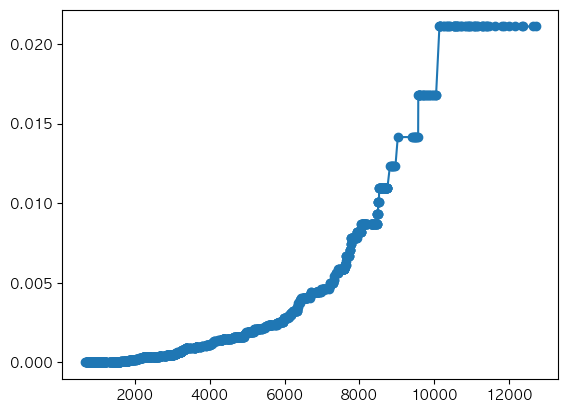

In [149]:
base_cum_haz = coxph_model1.baseline_cumulative_hazard_
plt.plot(base_cum_haz.index, base_cum_haz.values, marker='o')
plt.show()

In [150]:
## Backward Elimination
def fit_and_score_features2(X):
    data = X.copy()
    y=data[["지속기간","부도"]]
    data.drop(["지속기간","부도"], axis=1, inplace=True)
    n_features = data.shape[1]
    scores = []
    m = CoxPHFitter(baseline_estimation_method="breslow", penalizer=0.0001)

    for j in data.columns:
        Xj = data.drop(j, axis=1, inplace=False)
        Xj=pd.merge(Xj, y,  how='right', left_index=True, right_index=True)
        m.fit(Xj, duration_col="지속기간", event_col="부도", show_progress=False)
        scores.append(m.concordance_index_)
        
    return np.array(scores)
    
data3 = data2.copy()
steps = []
models = []
m = CoxPHFitter(baseline_estimation_method='breslow', penalizer=0.0001)
var = 'full'
while data3.shape[1]>2:
    m.fit(data3, '지속기간', '부도', show_progress = False)
    models.append(m.concordance_index_)
    score = fit_and_score_features2(data3)
    temp = [None, None]
    temp.extend(score.tolist())
    result = pd.DataFrame([data3.columns.tolist(), temp]).T
    steps.append(result)
    print('\n', var, '\n',m.concordance_index_)
    print('\n-------------------')
    print(result)
    var = '- ' + data3.columns[score.argmax()+2]
    data3.drop(data3.columns[score.argmax()+2], axis=1, inplace=True)

obj = m.fit(data2[steps[np.array(models).argmax()].iloc[:,0]], '지속기간', '부도')
obj.summary


 full 
 0.9747448149811806

-------------------
           0       1
0       지속기간    None
1         부도    None
2       부채비율 0.97459
3     자기자본비율 0.97451
4   총자산영업이익율 0.97597
5        ROA 0.97512
6        ROE 0.97436
7   매출액영업이익율 0.97536
8     총자산증가율 0.97606
9     매출액증가율 0.97203
10  당기순이익증가율 0.97326
11   영업이익증가율 0.97526
12      유동비율 0.97498
13     자산회전율 0.97691
14     부채회전율 0.97397
15     자본회전율 0.97487
16    총매출액규모 0.97611
17     총자산규모 0.97540
18    GDP성장률 0.97445
19     원달러환율 0.97487
20     CD91일 0.97380
21     코스닥종가 0.97358
22   전산업생산지수 0.97382
23    경제심리지수 0.97492
24    뉴스심리지수 0.97349

 - 자산회전율 
 0.976913306795124

-------------------
           0       1
0       지속기간    None
1         부도    None
2       부채비율 0.97680
3     자기자본비율 0.97631
4   총자산영업이익율 0.97605
5        ROA 0.97609
6        ROE 0.97665
7   매출액영업이익율 0.97685
8     총자산증가율 0.97685
9     매출액증가율 0.97597
10  당기순이익증가율 0.97656
11   영업이익증가율 0.97738
12      유동비율 0.97693
13     부채회전율 0.97629
14     자본회전율 0.97682
15    총매출액규모 0.976

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
부채비율,-0.00003,0.99997,0.00013,-0.00029,0.00023,0.99971,1.00023,0.00000,-0.23101,0.81730,0.29105
자기자본비율,-0.34189,0.71043,0.32019,-0.96945,0.28567,0.37929,1.33065,0.00000,-1.06778,0.28562,1.80783
총자산영업이익율,-0.66247,0.51558,0.49440,-1.63148,0.30654,0.19564,1.35872,0.00000,-1.33994,0.18027,2.47181
ROA,0.32444,1.38326,0.17563,-0.01979,0.66868,0.98040,1.95165,0.00000,1.84728,0.06471,3.94996
ROE,-0.01243,0.98765,0.02141,-0.05440,0.02954,0.94706,1.02998,0.00000,-0.58047,0.56159,0.83240
매출액영업이익율,0.01129,1.01135,0.03306,-0.05351,0.07608,0.94789,1.07905,0.00000,0.34135,0.73284,0.44843
총자산증가율,-0.00206,0.99794,0.00208,-0.00614,0.00201,0.99388,1.00201,0.00000,-0.99243,0.32099,1.63942
매출액증가율,-0.00091,0.99909,0.00070,-0.00229,0.00046,0.99771,1.00046,0.00000,-1.30153,0.19308,2.37275
당기순이익증가율,0.00022,1.00022,0.00009,0.00005,0.00040,1.00005,1.00040,0.00000,2.51753,0.01182,6.40287


In [151]:
obj.concordance_index_

0.9775328758848221

In [152]:
coxph_model3 = CoxPHFitter(baseline_estimation_method="breslow")
coxph_model3.fit(data2, duration_col="지속기간", event_col="부도", \
    formula="ROA + 당기순이익증가율 + 영업이익증가율 + 총자산규모 + 원달러환율 + CD91일 + 코스닥종가 + 전산업생산지수 + 뉴스심리지수")
coxph_model3.summary

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [153]:
coxph_model3 = CoxPHFitter(baseline_estimation_method="breslow", penalizer=0.0001)
coxph_model3.fit(data2, duration_col="지속기간", event_col="부도", \
    formula="ROA + 당기순이익증가율 + 영업이익증가율 + 총자산규모 + 원달러환율 + CD91일 + 코스닥종가 + 전산업생산지수 + 뉴스심리지수")
coxph_model3.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
ROA,-1.05206,0.34922,0.28091,-1.60263,-0.50149,0.20137,0.60563,0.00000,-3.74520,0.00018,12.43770
당기순이익증가율,0.00102,1.00102,0.00114,-0.00121,0.00325,0.99879,1.00325,0.00000,0.89487,0.37086,1.43107
영업이익증가율,0.00001,1.00001,0.00166,-0.00325,0.00326,0.99676,1.00327,0.00000,0.00418,0.99667,0.00481
총자산규모,-0.34226,0.71016,0.51435,-1.35038,0.66585,0.25914,1.94614,0.00000,-0.66543,0.50578,0.98343
원달러환율,-0.64433,0.52501,0.08130,-0.80367,-0.48500,0.44768,0.61570,0.00000,-7.92579,0.00000,48.64812
CD91일,-39.39561,0.00000,9.23391,-57.49375,-21.29747,0.00000,0.00000,0.00000,-4.26640,0.00002,15.61942
코스닥종가,0.38314,1.46688,0.05360,0.27809,0.48818,1.32061,1.62935,0.00000,7.14868,0.00000,40.05388
전산업생산지수,-10.49133,0.00003,1.05234,-12.55387,-8.42878,0.00000,0.00022,0.00000,-9.96956,0.00000,75.35364
뉴스심리지수,7.09529,1206.27259,1.12072,4.89872,9.29186,134.11861,10849.30393,0.00000,6.33103,0.00000,31.93514


In [155]:
coxph_model4 = CoxPHFitter(baseline_estimation_method="breslow", penalizer=0.0001)
coxph_model4.fit(data2, duration_col="지속기간", event_col="부도", \
    formula="ROA + 총자산규모 + 원달러환율 + CD91일 + 코스닥종가 + 전산업생산지수 + 뉴스심리지수")
coxph_model4.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
ROA,-0.37315,0.68856,0.08697,-0.54360,-0.20270,0.58066,0.81653,0.00000,-4.29073,0.00002,15.77709
총자산규모,-0.18040,0.83494,0.20871,-0.58946,0.22866,0.55463,1.25692,0.00000,-0.86435,0.38740,1.36812
원달러환율,-0.64117,0.52668,0.08130,-0.80051,-0.48183,0.44910,0.61765,0.00000,-7.88686,0.00000,48.19714
CD91일,-39.29116,0.00000,9.23391,-57.38929,-21.19302,0.00000,0.00000,0.00000,-4.25509,0.00002,15.54640
코스닥종가,0.38308,1.46680,0.05360,0.27804,0.48813,1.32054,1.62926,0.00000,7.14764,0.00000,40.04298
전산업생산지수,-10.51533,0.00003,1.05234,-12.57787,-8.45279,0.00000,0.00021,0.00000,-9.99237,0.00000,75.68537
뉴스심리지수,7.11005,1224.21450,1.12072,4.91349,9.30662,136.11347,11010.67480,0.00000,6.34420,0.00000,32.05845


In [157]:
coxph_model5 = CoxPHFitter(baseline_estimation_method="breslow", penalizer=0.0001)
coxph_model5.fit(data2, duration_col="지속기간", event_col="부도", \
    formula="ROA + 원달러환율 + CD91일 + 코스닥종가 + 전산업생산지수 + 뉴스심리지수")
coxph_model5.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
ROA,-0.42323,0.65493,0.04865,-0.51859,-0.32788,0.59536,0.72045,0.00000,-8.69919,0.00000,58.05378
원달러환율,-0.63720,0.52877,0.08130,-0.79654,-0.47786,0.45089,0.62011,0.00000,-7.83804,0.00000,47.63467
CD91일,-36.88610,0.00000,9.23391,-54.98424,-18.78797,0.00000,0.00000,0.00000,-3.99463,0.00006,13.91377
코스닥종가,0.38812,1.47421,0.05360,0.28308,0.49317,1.32721,1.63750,0.00000,7.24170,0.00000,41.03747
전산업생산지수,-10.44879,0.00003,1.05234,-12.51133,-8.38625,0.00000,0.00023,0.00000,-9.92914,0.00000,74.76773
뉴스심리지수,7.03281,1133.21065,1.12072,4.83624,9.22938,125.99527,10192.17949,0.00000,6.27528,0.00000,31.41598


In [164]:
print("Full Model:", coxph_model1.concordance_index_)
print("Backward Elimination:", obj.concordance_index_)
print(coxph_model3.concordance_index_)
print(coxph_model4.concordance_index_)
print(coxph_model5.concordance_index_)

Full Model: 0.9729945323027834
Backward Elimination: 0.9775328758848221
0.9671396044051362
0.9678521088582891
0.9520685862982295


In [182]:
data4 = data2[['지속기간', '부도', 'ROA', '총자산규모', '원달러환율', 'CD91일', '코스닥종가', '전산업생산지수', '뉴스심리지수']]

In [186]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(coxph_model4, data4, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1522 total observations, 1435 right-censored observations>
         test_name = proportional_hazard_test

---
         test_statistic   p  -log2(p)
CD91일               NaN NaN       NaN
ROA                 NaN NaN       NaN
뉴스심리지수              NaN NaN       NaN
원달러환율               NaN NaN       NaN
전산업생산지수             NaN NaN       NaN
총자산규모               NaN NaN       NaN
코스닥종가               NaN NaN       NaN


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1522 total observations, 1435 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic   p  -log2(p)
CD91일   km               NaN NaN       NaN
        rank             NaN NaN       NaN
ROA     km               NaN NaN       NaN
        rank             NaN NaN       NaN
뉴스심리지수  km               NaN NaN       NaN
        rank             NaN NaN       NaN
원달러환율   km               NaN NaN       NaN
        rank             NaN NaN       NaN
전산업생산지수 km               NaN NaN       NaN
        rank             NaN NaN       NaN
총자산규모   km               NaN NaN       NaN
        rank             NaN NaN       NaN
코스닥종가   km               NaN NaN       NaN
        rank             NaN NaN       NaN



1. Variable 'ROA' failed the non-proportional test: p-value is  nan.

   Advice 1: the functional form of the variable 'ROA' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ROA' using pd.cut, and then specify it in `strata=['ROA',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable '총자산규모' failed the non-proportional test: p-value is  nan.

   Advice 1: the functional form of the variable '총자산규모' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how

[[<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=nan)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=nan)'>]]

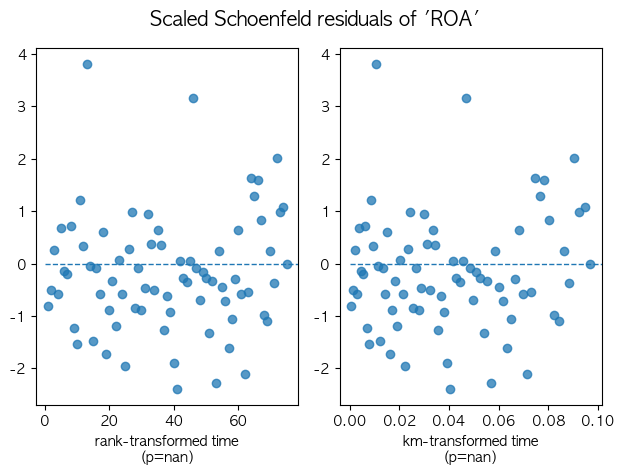

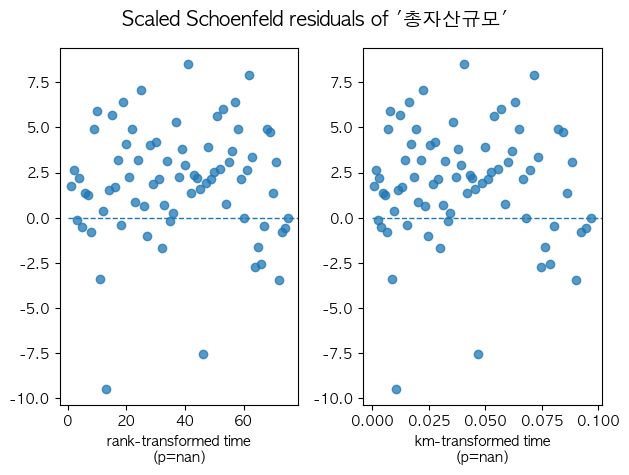

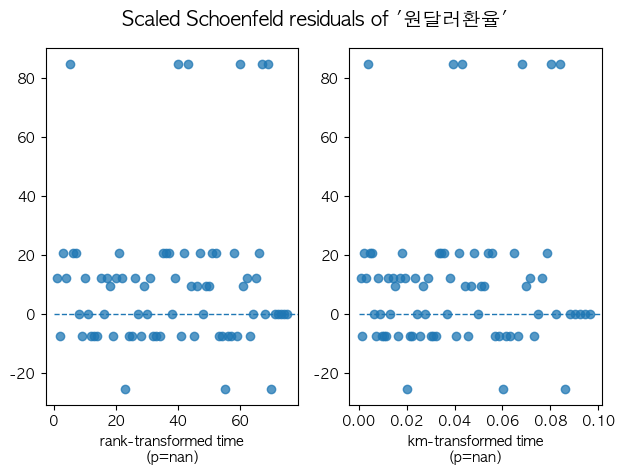

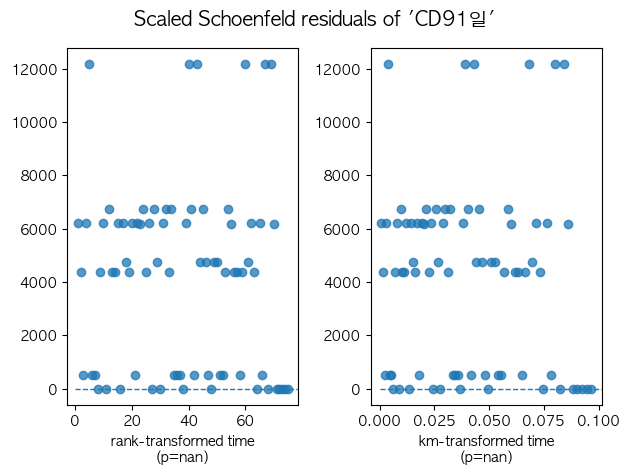

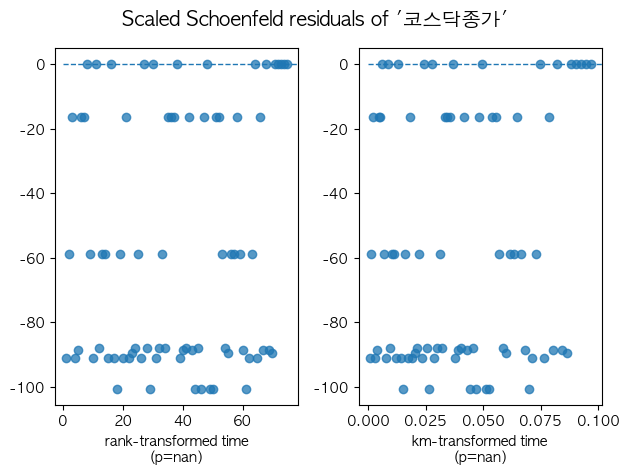

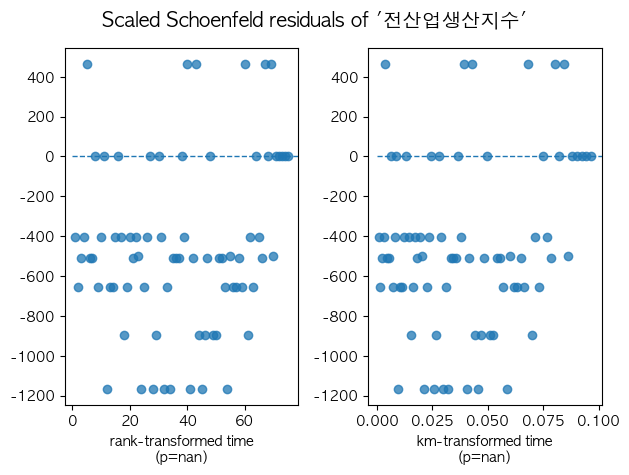

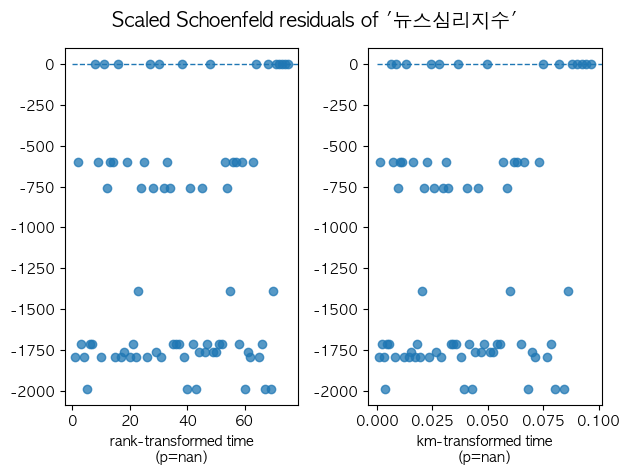

In [185]:
coxph_model4.check_assumptions(data4, p_value_threshold=0.05, show_plots=True)

# 상관계수

In [165]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.5), size = 20, xycoords = ax.transAxes)

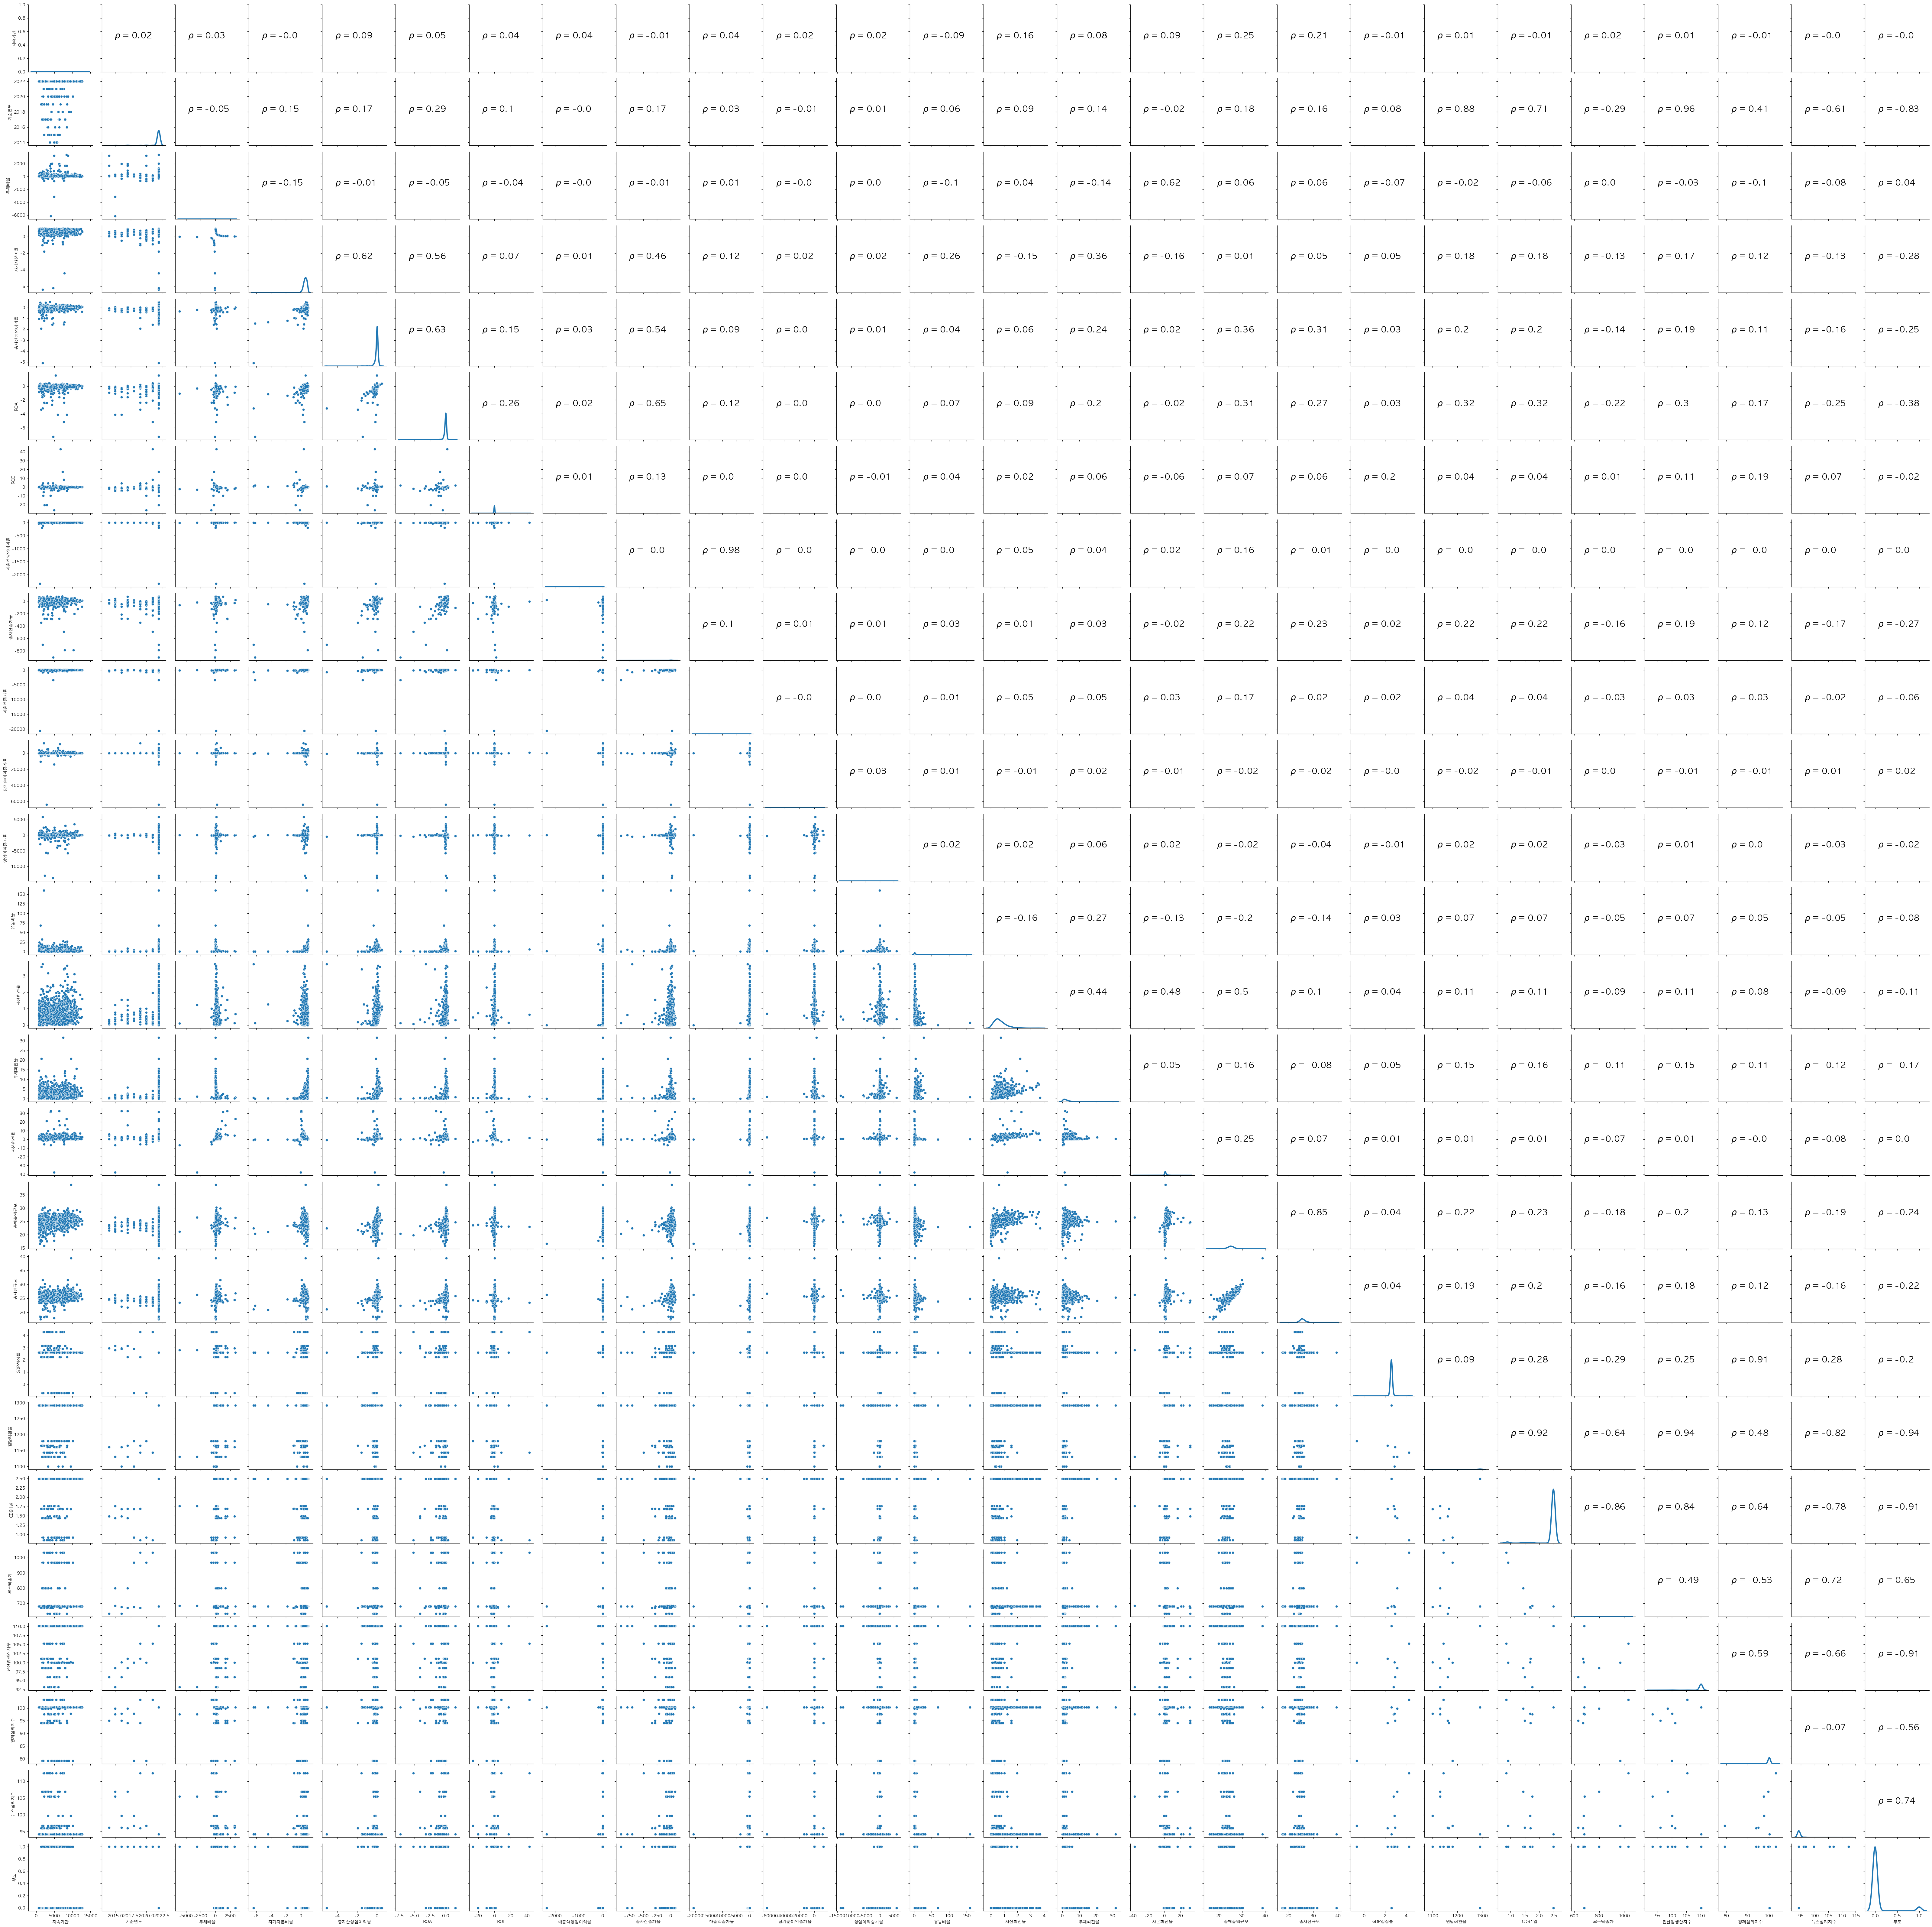

<Figure size 640x480 with 0 Axes>

In [173]:
g = sns.PairGrid(data)
g.map_lower(sns.scatterplot)
g.map_upper(corr)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()
plt.savefig('figpath.png', dpi=400)

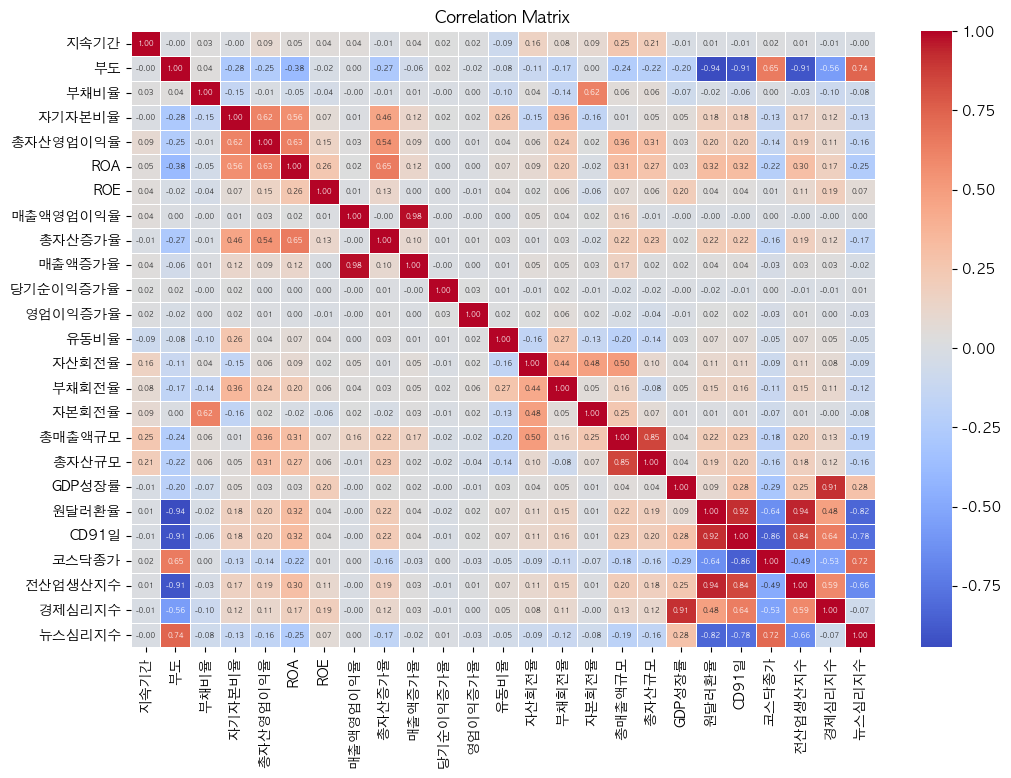

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

In [172]:
from lifelines.utils import k_fold_cross_validation
penalty = np.exp(np.linspace(-2, 0, 10))
scores = []
for pen in penalty:
    if (pen <= 0.001) & (pen >= -0.001):
        pass
    else:
        cph = CoxPHFitter(l1_ratio=1, penalizer=pen)
        scores.append(np.mean(k_fold_cross_validation(cph, data2, duration_col='지속기간', event_col='부도', scoring_method="concordance_index", k=10)))
plt.plot(np.log(penalty), scores)
plt.axvline(np.log(penalty[np.argmax(np.array(scores))]), color = 'b', ls='--')
plt.show()

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
opt_lambda_lasso = penalty[np.argmax(np.array(scores))]
cox_lasso = CoxPHFitter(l1_ratio=1, penalizer=opt_lambda_lasso)
cox_lasso.fit(data2, duration_col="지속기간", event_col="부도")
beta_lasso = cox_lasso.params_.values
print(beta_lasso)